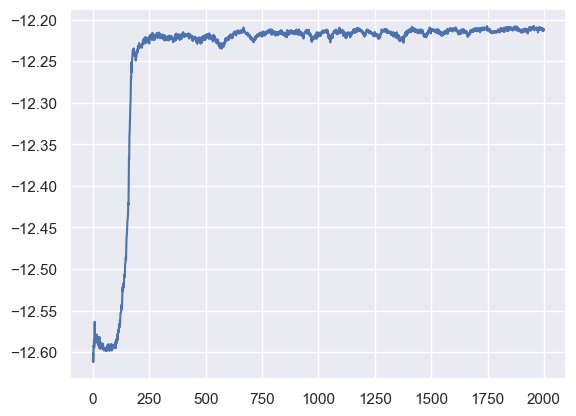

In [1]:
import os
import gym
from environments.energy_management_env import EnergyManagementEnv

# Import the Agent class from your code


# Import environment registration function
from environments.env_registration import register_env

# Define environment parameters
env_params = {
    'SOC_min': 0.2,
    'SOC_max': 0.8,
    'E': 1000,
    'lambda_val': 0.1,
    'data_path': 'data/Data_input.csv',
    'initial_SOC': 0.5  # Set to None if not using an initial_SOC
}

# Register the custom environment
register_env('EnergyManagement-v0', 'environments.env_registration:environment_creator',{'environment_class': EnergyManagementEnv, **env_params})

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from policies.lstm_categorical_policy import LSTMCategoricalPolicy
from policies.tcn_categorical_policy import TCNCategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
from agents.a2c import A2C
from agents.ppo import PPO
from agents.reinforce import REINFORCE
import gym


energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=8)

categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[16])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_agent, totals_a2c = A2C(energy_management, categorical, value_estimator, epochs=2000, gamma = 1, T = 720)

In [2]:
categorical = LSTMCategoricalPolicy(energy_management, lr=1e-2)
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_agent, totals_a2c = A2C(energy_management, categorical, value_estimator, epochs=2000, gamma = 1, T = 720)

categorical = TCNCategoricalPolicy(energy_management, lr=1e-2)
value_estimator = ValueEstimator(energy_management, lr=1e-2)
ppo_agent, totals_ppo = PPO(energy_management, categorical, value_estimator, epochs=2000, gamma = 1, T = 720, kl_threshold=1e-1)

ValueError: LSTM: Expected input to be 2D or 3D, got 4D instead

In [ ]:
categorical = LSTMCategoricalPolicy(energy_management, lr=1e-2)
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_agent, totals_a2c = A2C(energy_management, categorical, value_estimator, epochs=2000, gamma = 1, T = 720)

categorical = TCNCategoricalPolicy(energy_management, lr=1e-2)
value_estimator = ValueEstimator(energy_management, lr=1e-2)
ppo_agent, totals_ppo = PPO(energy_management, categorical, value_estimator, epochs=2000, gamma = 1, T = 720, kl_threshold=1e-1)